# Data Mining and Probabilistic Reasoning, WS20/21
Dr. Gjergji Kasneci, The University of Tübingen

---
Practical Foundations of Data Science
---
Date 
7.12.2020

Vadim Borisov (vadim.borisov@uni-tuebingen.de)

In [ ]:
# a standart tool set for data science 
import os
import numpy as np
import pandas as pd
 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, Normalizer
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
 
try:
    import pydotplus
except:
    os.system('pip install pydotplus')
 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
 
from IPython.display import Image
plt.style.use('ggplot')
# color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

In [ ]:
# download data 
if not os.path.isfile('datasets_german_credit_data.csv'):
  !wget -O data.zip https://www.dropbox.com/s/s2j64e2peivekq5/data.zip?dl=1
  !unzip data.zip -d .

--2020-12-07 11:13:41--  https://www.dropbox.com/s/s2j64e2peivekq5/data.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/s2j64e2peivekq5/data.zip [following]
--2020-12-07 11:13:41--  https://www.dropbox.com/s/dl/s2j64e2peivekq5/data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc86fafcad9f8f5ce8dd08ba18cb.dl.dropboxusercontent.com/cd/0/get/BEnk4dqAUkKjOR0hV2hD9NdthIxg7NZnk7NLxqbSqzwFTk8-hrv9TelOnxyZ0S3UHF7vD8ufzzpnUYQeC2VIh6ZsW7bi2Dp8YysGHa5eG6jrAgZbI03LfO3k53ZWqJsBJb4/file?dl=1# [following]
--2020-12-07 11:13:41--  https://uc86fafcad9f8f5ce8dd08ba18cb.dl.dropboxusercontent.com/cd/0/get/BEnk4dqAUkKjOR0hV2hD9NdthIxg7NZnk7NLxqbSqzwFTk8-hrv9TelOnxyZ0S3UHF7vD8ufzzpnUYQeC2VIh6ZsW7bi2Dp8YysGHa5eG6jrAgZbI03LfO3k53ZW

In [ ]:
!ls

datasets_german_credit_data.csv  dt.png      overfitting.png  toy3.png
data.zip			 kfolds.png  sample_data
decision_tree10.png		 knn1.png    toy1.png
decision_tree.png		 __MACOSX    toy2.png


In [ ]:
# German credit data set classifies people described by a set of attributes as good or bad credit risks.

In [ ]:
df = pd.read_csv('datasets_german_credit_data.csv')

In [ ]:
df.head()

Age     Sex  Job Housing  ... Credit amount Duration              Purpose  Risk
0   67    male    2     own  ...          1169        6             radio/TV  good
1   22  female    2     own  ...          5951       48             radio/TV   bad
2   49    male    1     own  ...          2096       12            education  good
3   45    male    2    free  ...          7882       42  furniture/equipment  good
4   53    male    2    free  ...          4870       24                  car   bad

[5 rows x 10 columns]

In [ ]:
df['Risk'], _ = pd.factorize(df['Risk']) 
# 0:good, 1:bad
df.head()

Age     Sex  Job Housing  ... Credit amount Duration              Purpose  Risk
0   67    male    2     own  ...          1169        6             radio/TV     0
1   22  female    2     own  ...          5951       48             radio/TV     1
2   49    male    1     own  ...          2096       12            education     0
3   45    male    2    free  ...          7882       42  furniture/equipment     0
4   53    male    2    free  ...          4870       24                  car     1

[5 rows x 10 columns]

In [ ]:
df.describe()

Age          Job  Credit amount     Duration         Risk
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000
mean     35.546000     1.904000    3271.258000    20.903000     0.300000
std      11.375469     0.653614    2822.736876    12.058814     0.458487
min      19.000000     0.000000     250.000000     4.000000     0.000000
25%      27.000000     2.000000    1365.500000    12.000000     0.000000
50%      33.000000     2.000000    2319.500000    18.000000     0.000000
75%      42.000000     2.000000    3972.250000    24.000000     1.000000
max      75.000000     3.000000   18424.000000    72.000000     1.000000

In [ ]:
df['Risk'].value_counts()

0    700
1    300
Name: Risk, dtype: int64

In [ ]:
df['Risk'].value_counts(normalize=True)


0    0.7
1    0.3
Name: Risk, dtype: float64

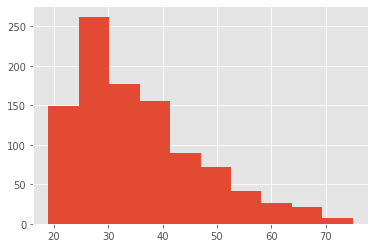

In [ ]:
df['Age'].hist()

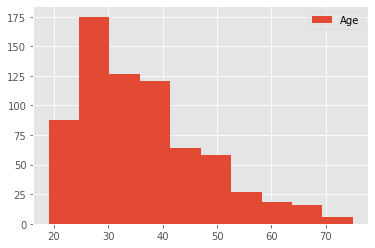

In [ ]:
df[df['Risk'] == 0]['Age'].hist(bins=10, legend=True)

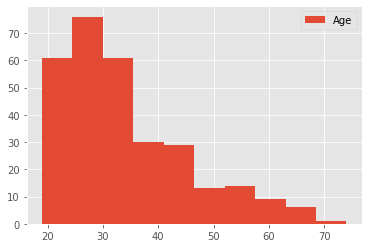

In [ ]:
df[df['Risk'] == 1]['Age'].hist(bins=10, legend=True)

Risk
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

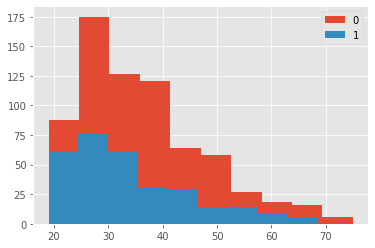

In [ ]:
df.groupby('Risk')['Age'].hist(bins=10, legend=True)

In [ ]:
df.groupby('Risk').describe()

Age                                    ... Duration                        
      count       mean        std   min   25%  ...      min   25%   50%   75%   max
Risk                                           ...                                 
0     700.0  36.224286  11.381145  19.0  27.0  ...      4.0  12.0  18.0  24.0  60.0
1     300.0  33.963333  11.222379  19.0  25.0  ...      6.0  12.0  24.0  36.0  72.0

[2 rows x 32 columns]

SQL query
```SQL
SELECT * FROM df WHERE Risk = 0 LIMIT 5;
```
Pandas query
```python
df[df['Risk'] == 0][:5]
```

In [ ]:
df.query('Risk == 0')[:5]


Age   Sex  Job Housing  ... Credit amount Duration              Purpose  Risk
0   67  male    2     own  ...          1169        6             radio/TV     0
2   49  male    1     own  ...          2096       12            education     0
3   45  male    2    free  ...          7882       42  furniture/equipment     0
5   35  male    1    free  ...          9055       36            education     0
6   53  male    2     own  ...          2835       24  furniture/equipment     0

[5 rows x 10 columns]

In [ ]:
df[['Age','Duration'] ]

Age  Duration
0     67         6
1     22        48
2     49        12
3     45        42
4     53        24
..   ...       ...
995   31        12
996   40        30
997   38        12
998   23        45
999   27        45

[1000 rows x 2 columns]

### 10 minutes to pandas tutorial
https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

---

# Decision Tree Learning





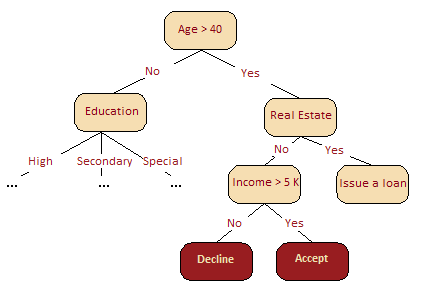



## How to Build a Decision Tree

### Toy example
Suppose we have a data set with balls with $9$ blue and $11$ orange color. The data set consists of a single feature vector $X$ (one Variable), which describes a ball's position. The goal is to estimate the ball color based on $X$. 
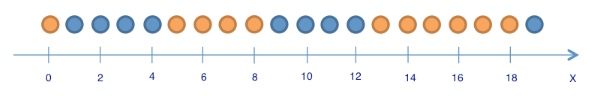




### Qustion: How to split the data?



## Answer 


Entropy:

$H(x) = - \sum_{x\in dom(X)} P(x) log_2P(x)$

Given the probbilites of picking blue and orange balls: $p_{blue}=\frac{9}{20}$ and $p_{orange}=\frac{11}{20}$, the entropy for first state $S_0$:

$H(S_0) = -\frac{9}{20}log_2\frac{9}{20} - \frac{11}{20}log_2\frac{11}{20} \approx 1$

For the next step we use the split value $X \leq 12$

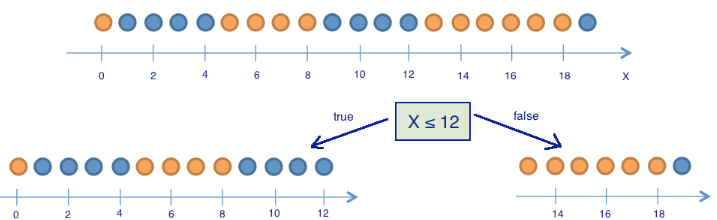


$H(S_1) = -\frac{5}{13}log_2\frac{5}{13} - \frac{8}{13}log_2\frac{8}{13} \approx 0.96$

$H(S_2) = -\frac{1}{7}log_2\frac{1}{7} - \frac{6}{7}log_2\frac{6}{7} \approx 0.6$

The entropy has decreased in both groups. This process is called - reduction of **information gain** (IG). Formally, the IG can be defined as: 

$IG(Q) = S_{n-1} - \sum_{i=0}^g \frac{N_i}{N}S_i$

Where $Q$ is the split condition, $g$ is the number of groups after the split, $N_i$ is the number of objects in the group $i$, and $N$ is the total number of objects before the slip. Therefore, the IG for the current split:

$IG(x \leq 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16$

Let us continue and divide the balls into groups until all of them have the same color. 



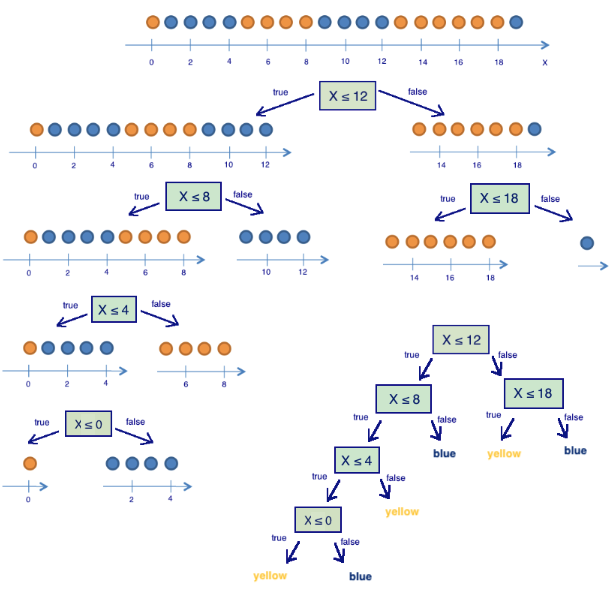

### Code Example 

In [ ]:
# only numerical columns 
selected_columns = ['Age', 'Credit amount', 'Duration']

X = df[selected_columns]
y = df['Risk']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# train a decision tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model.fit(X_train, y_train)
#model.predict(X_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=['Low Risk', 'High Risk'], 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)


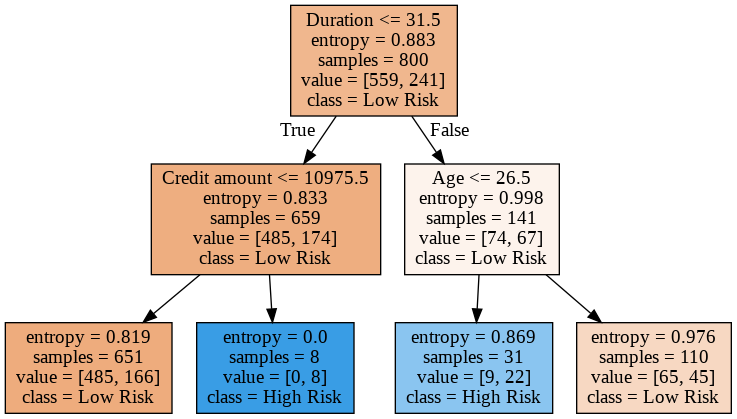

In [ ]:
dt_file_name = 'decision_tree.png'
tree_graph_to_png(tree=model, feature_names=selected_columns,
                  png_file_to_save = dt_file_name)
Image(filename = dt_file_name )

### Hyperparameters vs Parametes of an ML model
Model parameters are estimated from data automatically, and model hyperparameters are set manually and are used in processes to help estimate model parameters. E.g., the decision tree's depth is a hyperparameter; a split value is a parameter of a machine learning model. 

More here: https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

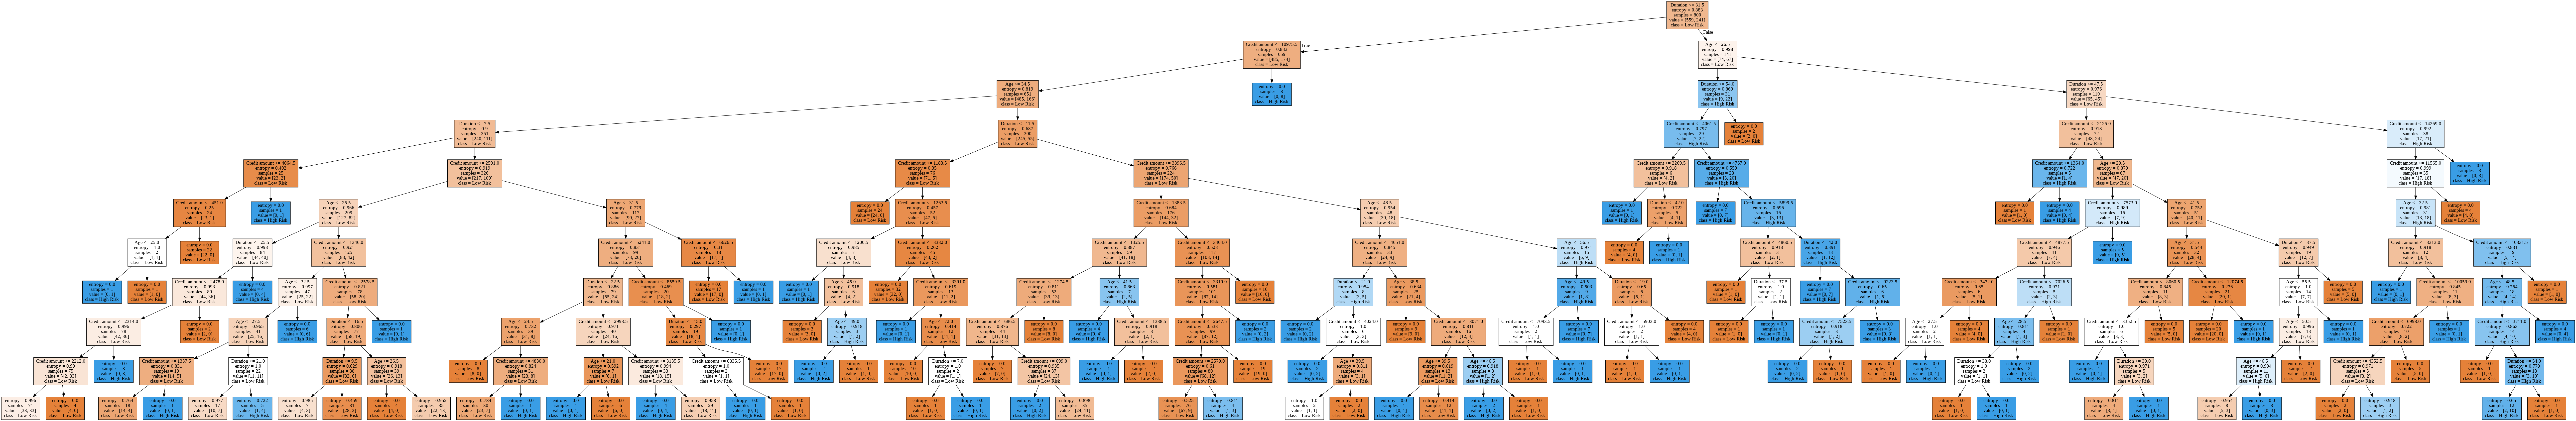

In [ ]:
dt_file_name = 'decision_tree10.png'
tree_graph_to_png(tree=model, feature_names=selected_columns,
                  png_file_to_save = dt_file_name)
Image(filename = dt_file_name )

### Questions: 

- How can we evaluate the performance of the decision tree model?
- Should a tree with a higher maximum depth perform better? 
- Why the performance of a machine learning model is almost always better on train data than test data? 


In [ ]:
# evaluation 
# Scikit-Learn API style 
...
# write code here

y_hat = model.predict(X_test)
y_hat_train = model.predict(X_train)
print(accuracy_score(y_test, y_hat))
print(accuracy_score(y_train, y_hat_train))

0.685
0.86


## Underfitting vs Overfitting

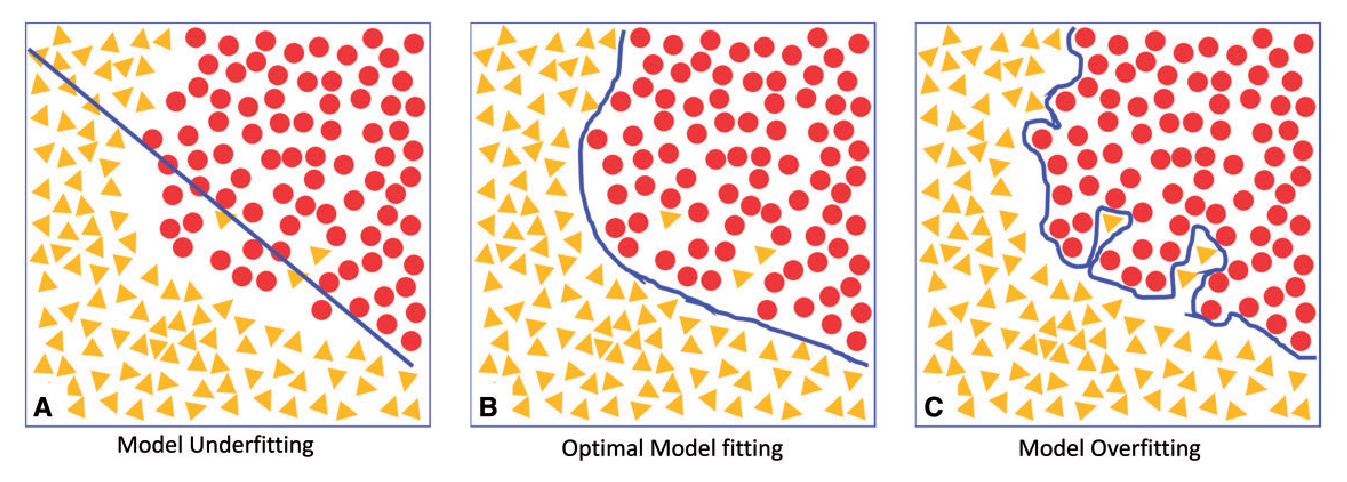

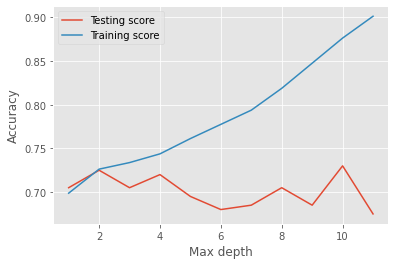

In [ ]:
performance_train = []
performance_test = []

max_depth_range = range(1,12)

for i in max_depth_range:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    performance_train.append(model.score(X_train,y_train))
    performance_test.append(accuracy_score(y_test, y_pred))


    
plt.ylabel('Accuracy')
plt.xlabel('Max depth') 

plt.plot(max_depth_range, performance_test, label="Testing score")
plt.plot(max_depth_range, performance_train, label="Training score")
plt.legend(loc="best")

#### Check the slides :)

# ... a better idea - Cross-Validation! 

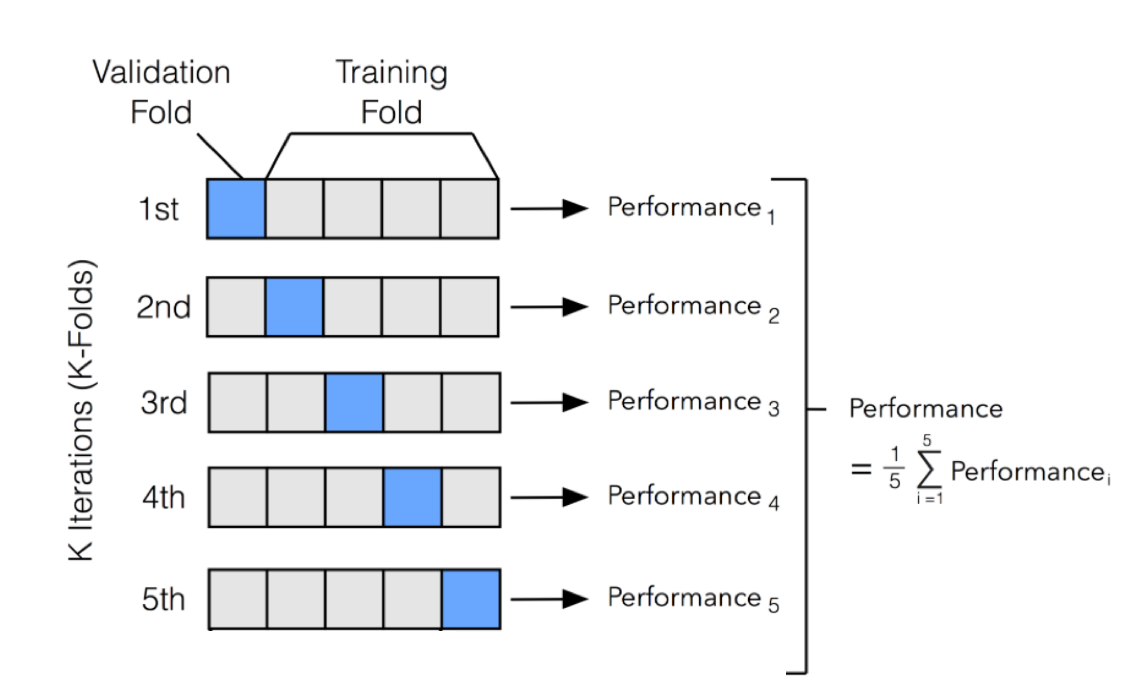
Img: http://ethen8181.github.io/machine-learning/model_selection/model_selection.html

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X.head(20)):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 18 19] TEST: [ 0  1 15 17]
TRAIN: [ 0  1  2  4  6  7  9 10 12 13 14 15 16 17 18 19] TEST: [ 3  5  8 11]
TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 12 14 15 17 19] TEST: [ 2 13 16 18]
TRAIN: [ 0  1  2  3  5  6  7  8 10 11 13 14 15 16 17 18] TEST: [ 4  9 12 19]
TRAIN: [ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 19] TEST: [ 6  7 10 14]


In [ ]:
def cross_validation(X, y, model):
    '''
    K-Folds Cross-Validation
    '''
    X, y = np.array(X), np.array(y)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    results = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        results.append(accuracy_score(y_test, y_hat))
        
    return np.mean(results), np.std(results)

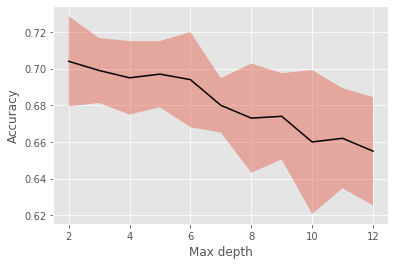

In [ ]:
performance_cv_mean = []
performance_cv_std = []

max_depth_range = range(2,13)

for i in max_depth_range:
    model = DecisionTreeClassifier(max_depth=i)
    performance = cross_validation(X, y, model)
    performance_cv_mean.append(performance[0])
    performance_cv_std.append(performance[1])

performance_cv_mean = np.array(performance_cv_mean)
performance_cv_std = np.array(performance_cv_std)

plt.ylabel('Accuracy')
plt.xlabel('Max depth') 

plt.plot(max_depth_range, performance_cv_mean, 'k-')
plt.fill_between(max_depth_range, performance_cv_mean-performance_cv_std, performance_cv_mean+performance_cv_std, alpha=0.4)
plt.show()

# k-Nearest Neighbors (kNN) Algorithm

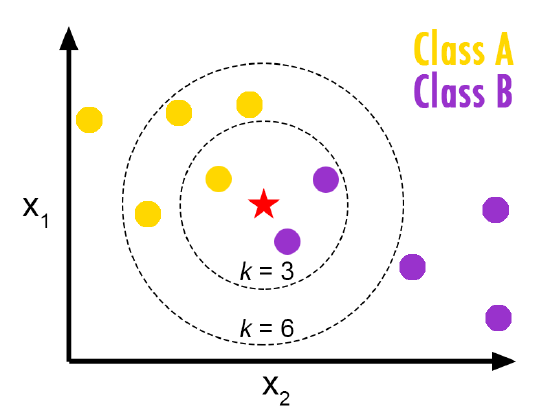








Formally the algorithm can be seen as:

$P(Y=j|X=x_0) = \frac{1}{k}\sum_{i \in N(x_0)}I(y_i=j)$

where $N$ is the set of k-nearest observation, and $I$ is an indicator function that becomes 1 if a given observation $(x_i,y_i)$ in $N$ is a member of class j, and 0 if otherwise.


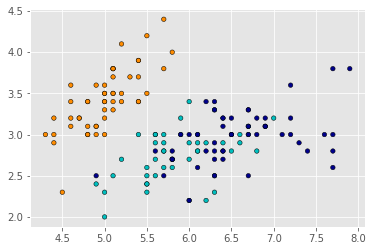

In [ ]:
# load a simple data set 
iris = load_iris()
X_iris = iris.data[:, [0,1]]
y_iris = iris.target

plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap=cmap_bold,
                edgecolor='k', s=20)

In [ ]:
def plot_knn(X, y, model, n_neighbors):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    
    h = .02 # step size 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"
              % (n_neighbors))

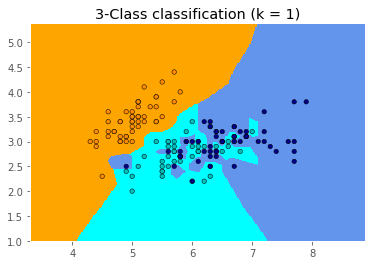

In [ ]:
n_neighbors = 1
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
knn_model.fit(X_iris, y_iris)
plot_knn(X_iris, y_iris, knn_model, n_neighbors)


# Questions
- What kind of set of numbers is better to use for the hyperparameter k in the kNN algorithm? 
- How to get almost 100% accuracy on the train data set using the kNN algorithm?  

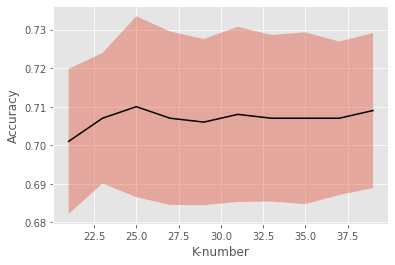

In [ ]:
performance_cv_mean = []
performance_cv_std = []

k_range = range(2,40,2)

for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i, n_jobs=-1, metric='l2')
    performance = cross_validation(X, y, model)
    performance_cv_mean.append(performance[0])
    performance_cv_std.append(performance[1])

performance_cv_mean = np.array(performance_cv_mean)
performance_cv_std = np.array(performance_cv_std)

plt.ylabel('Accuracy')
plt.xlabel('K-number') 

plt.plot(k_range, performance_cv_mean, 'k-')
plt.fill_between(k_range, performance_cv_mean-performance_cv_std, performance_cv_mean+performance_cv_std, alpha=0.4)
plt.show()

----
# Data Preparation 


## Handling missing values - NaNs
Missing values (NaNs) are frequently occurring in real-world data sets. It is, therefore, important to take care of missing values beforehand. There are different ways of handling missing values, including the following:

- Drop variables with missing values (substantial potential loss of information)
- Drop rows with missing values (still a potential loss of information)
- Imputation: replace missing values with some number (usually with the mean of the variable)

Saving accounts and Checking account are categorical variables. We will not replace missing values with the mean but with the mode. Another option would be to introduce NaN as a new category.

There are also more sophisticated imputation techniques, for example, using kNNs or GANs. We invite you to learn more about different imputation techniques and to apply your knowledge in the upcoming homework. Hint: that some imputation techniques are already implemented in Python; see the [fancyimpute](https://github.com/iskandr/fancyimpute) module, for example.

In [ ]:
# return to our data set 
df.head()

Age     Sex  Job Housing  ... Credit amount Duration              Purpose  Risk
0   67    male    2     own  ...          1169        6             radio/TV     0
1   22  female    2     own  ...          5951       48             radio/TV     1
2   49    male    1     own  ...          2096       12            education     0
3   45    male    2    free  ...          7882       42  furniture/equipment     0
4   53    male    2    free  ...          4870       24                  car     1

[5 rows x 10 columns]

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imp.fit_transform(df))
df_imputed.columns = df.columns

In [ ]:
df_imputed.head()

Age     Sex Job Housing  ... Credit amount Duration              Purpose Risk
0  67    male   2     own  ...          1169        6             radio/TV    0
1  22  female   2     own  ...          5951       48             radio/TV    1
2  49    male   1     own  ...          2096       12            education    0
3  45    male   2    free  ...          7882       42  furniture/equipment    0
4  53    male   2    free  ...          4870       24                  car    1

[5 rows x 10 columns]

Also, you can do it quickly with pandas:

```python
df.fillna(0)
df.fillna(df.mean())
```

## Categorical Data

Categorical variables belong to the group of discrete variables. Categorical variables can take on one of a countable and usually limited number of different values/categories. Categorical data can also take on numerical values (such as “1” indicating red wine and “2” indicating white wine), but those numbers do not have mathematical meaning (i.e. the numbers just represent a distinct category)



In [ ]:
df_imputed.head()

Age     Sex Job Housing  ... Credit amount Duration              Purpose Risk
0  67    male   2     own  ...          1169        6             radio/TV    0
1  22  female   2     own  ...          5951       48             radio/TV    1
2  49    male   1     own  ...          2096       12            education    0
3  45    male   2    free  ...          7882       42  furniture/equipment    0
4  53    male   2    free  ...          4870       24                  car    1

[5 rows x 10 columns]

In [ ]:
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

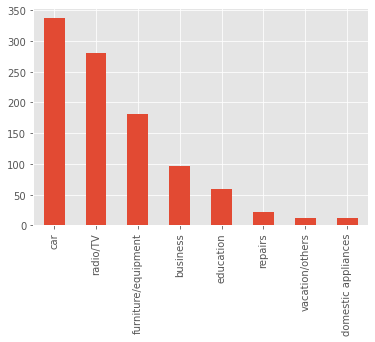

In [ ]:
df_imputed['Purpose'].value_counts().plot(kind='bar')

In [ ]:
pd.factorize(df_imputed['Purpose'])

(array([0, 0, 1, 2, 3, 1, 2, 3, 0, 3, 3, 4, 0, 3, 3, 0, 0, 4, 3, 0, 3, 0,
        3, 3, 2, 2, 0, 0, 0, 4, 4, 2, 3, 4, 2, 0, 1, 0, 5, 0, 0, 0, 6, 3,
        3, 3, 0, 3, 3, 0, 2, 3, 0, 3, 3, 3, 0, 0, 3, 2, 4, 0, 4, 4, 0, 6,
        0, 3, 1, 0, 3, 0, 7, 4, 1, 3, 0, 0, 3, 2, 0, 0, 4, 7, 0, 4, 2, 1,
        3, 6, 0, 3, 0, 2, 3, 4, 1, 4, 0, 3, 3, 0, 0, 2, 3, 7, 3, 3, 2, 4,
        4, 1, 3, 3, 0, 0, 0, 2, 2, 3, 0, 3, 2, 3, 2, 3, 0, 6, 3, 3, 3, 1,
        2, 2, 0, 0, 3, 0, 0, 0, 3, 0, 0, 2, 2, 4, 3, 3, 2, 0, 0, 0, 0, 3,
        4, 2, 6, 1, 3, 0, 0, 3, 5, 3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 0, 1, 3,
        2, 0, 0, 3, 4, 4, 3, 2, 3, 0, 3, 3, 0, 2, 4, 4, 4, 0, 0, 1, 0, 2,
        3, 2, 1, 3, 4, 1, 3, 3, 2, 5, 4, 3, 0, 0, 4, 4, 0, 1, 4, 0, 2, 3,
        0, 1, 0, 4, 3, 6, 0, 2, 0, 2, 0, 3, 0, 0, 0, 0, 3, 4, 0, 0, 3, 0,
        3, 4, 1, 4, 0, 3, 2, 0, 3, 2, 3, 2, 2, 0, 0, 0, 3, 0, 2, 0, 3, 1,
        3, 0, 4, 0, 3, 0, 3, 2, 3, 0, 6, 0, 0, 2, 2, 0, 3, 2, 0, 2, 3, 3,
        3, 7, 0, 0, 4, 3, 3, 3, 4, 2, 

# Question
- How can we prepare categorical data for an ML algorithm?

In [ ]:
df['Purpose'][:10]

0               radio/TV
1               radio/TV
2              education
3    furniture/equipment
4                    car
5              education
6    furniture/equipment
7                    car
8               radio/TV
9                    car
Name: Purpose, dtype: object

## Answer

In [ ]:
fav_animal = ['cat', 'dog', 'cat', 'dog']
fav_animal_enc = [0,1,0,1]
'cat' < 'dog'

False

### One-Hot Encoding Tenchnique 
Some ML algorithms interpret numerical data in a way, such that x > y implies x is better than y. This does not make any sense for our categorical variables, where the numbers just represent a certain category. Take the Purpose variable as an example: the category 3 (car) could be preferred over the category 2 (furniture/equipment) just because 3 > 2, which might lead to misclassifications. To avoid this we introduce One Hot Encoding.
One-Hot Encoding transforms a given array into a sparse matrix, where each column represents a distinct value of the given array. For example, imagine we have an array including the 3 distinct values {a, b, c}. The instance $x_i = a$ of that array would be represented as [1, 0, 0] in the new sparse matrix.

In [ ]:
# remove the Sex column, since we do not want to one-hot encoded it. 
del categorical_columns[0]


In [ ]:
categorical_columns

['Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [ ]:

labelenc_dict = {}
ohenc_dict = {}


for c in categorical_columns:
    labelenc_dict[c] = LabelEncoder().fit(df_imputed[c])
    df[c] = labelenc_dict[c].transform(df_imputed[c])
    
    ohenc_dict[c] = OneHotEncoder().fit(df_imputed[c].values.reshape(-1,1))
    temp_var = pd.DataFrame(OneHotEncoder().fit_transform(df_imputed[c].values.reshape(-1,1)).toarray())  
    temp_var.columns = [c+'_'+str(i) for i in range(temp_var.shape[1])]
    
    df_imputed = df_imputed.drop(c, axis=1)
    df_imputed = df_imputed.join(temp_var)
    
    del temp_var


In [ ]:
df_imputed.head()

Age     Sex Job Credit amount  ... Purpose_4 Purpose_5  Purpose_6  Purpose_7
0  67    male   2          1169  ...       0.0       1.0        0.0        0.0
1  22  female   2          5951  ...       0.0       1.0        0.0        0.0
2  49    male   1          2096  ...       0.0       0.0        0.0        0.0
3  45    male   2          7882  ...       1.0       0.0        0.0        0.0
4  53    male   2          4870  ...       0.0       0.0        0.0        0.0

[5 rows x 24 columns]

In [ ]:
labelenc_dict['Sex'] = LabelEncoder()
df_imputed['Sex'] = labelenc_dict['Sex'].fit_transform(df_imputed['Sex'])

In [ ]:
df_imputed.tail()

Age  Sex Job Credit amount  ... Purpose_4 Purpose_5  Purpose_6  Purpose_7
995  31    0   1          1736  ...       1.0       0.0        0.0        0.0
996  40    1   3          3857  ...       0.0       0.0        0.0        0.0
997  38    1   2           804  ...       0.0       1.0        0.0        0.0
998  23    1   2          1845  ...       0.0       1.0        0.0        0.0
999  27    1   2          4576  ...       0.0       0.0        0.0        0.0

[5 rows x 24 columns]

In [ ]:
df.shape, df_imputed.shape

((1000, 10), (1000, 24))

**Question**:

What are the drawbacks of the one-hot encouding tenchnique?

In [ ]:
df_imputed.Age = df_imputed.Age.astype(np.int8)
df_imputed.Job = df_imputed.Job.astype(np.int8)
df_imputed.Risk = df_imputed.Risk.astype(np.int8)

In [ ]:
df_imputed.Risk.value_counts()

0    700
1    300
Name: Risk, dtype: int64

In [ ]:
df_imputed.dtypes

Age                      int8
Sex                     int64
Job                      int8
Credit amount          object
Duration               object
Risk                     int8
Housing_0             float64
Housing_1             float64
Housing_2             float64
Saving accounts_0     float64
Saving accounts_1     float64
Saving accounts_2     float64
Saving accounts_3     float64
Checking account_0    float64
Checking account_1    float64
Checking account_2    float64
Purpose_0             float64
Purpose_1             float64
Purpose_2             float64
Purpose_3             float64
Purpose_4             float64
Purpose_5             float64
Purpose_6             float64
Purpose_7             float64
dtype: object

In [ ]:
df.shape, df_imputed.shape

((1000, 10), (1000, 24))

In [ ]:
X_clean = df_imputed.drop('Risk',1)
y_clean = df_imputed['Risk']


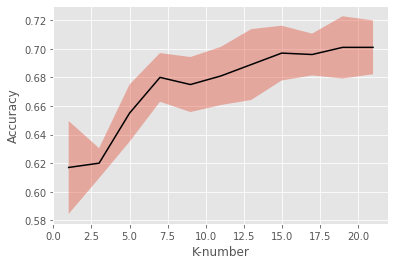

In [ ]:
performance_cv_mean = []
performance_cv_std = []

k_range = range(1,22,2)

for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    performance = cross_validation(X_clean, y_clean, model)
    performance_cv_mean.append(performance[0])
    performance_cv_std.append(performance[1])

performance_cv_mean = np.array(performance_cv_mean)
performance_cv_std = np.array(performance_cv_std)

plt.ylabel('Accuracy')
plt.xlabel('K-number') 

plt.plot(k_range, performance_cv_mean, 'k-')
plt.fill_between(k_range, performance_cv_mean-performance_cv_std, performance_cv_mean+performance_cv_std, alpha=0.4)
plt.show()

### Data Scaling 

In [ ]:
sk = StandardScaler() # z-transformation 
X_clean_sk = sk.fit_transform(X_clean)

In [ ]:
X_clean_sk

array([[ 2.76645648,  0.67028006,  0.14694918, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-1.19140394, -1.49191369,  0.14694918, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [ 1.18331231,  0.67028006, -1.38377145, ..., -0.62360956,
        -0.14998296, -0.11020775],
       ...,
       [ 0.21583532,  0.67028006,  0.14694918, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-1.10345149,  0.67028006,  0.14694918, ...,  1.60356745,
        -0.14998296, -0.11020775],
       [-0.75164167,  0.67028006,  0.14694918, ..., -0.62360956,
        -0.14998296, -0.11020775]])

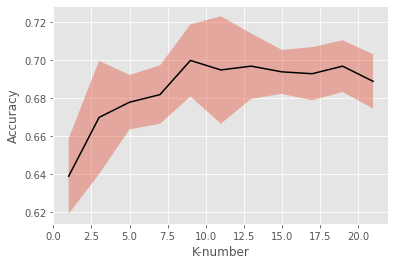

In [ ]:
performance_cv_mean = []
performance_cv_std = []

k_range = range(1,22,2)

for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    performance = cross_validation(X_clean_sk, y_clean, model)
    performance_cv_mean.append(performance[0])
    performance_cv_std.append(performance[1])

performance_cv_mean = np.array(performance_cv_mean)
performance_cv_std = np.array(performance_cv_std)

plt.ylabel('Accuracy')
plt.xlabel('K-number') 

plt.plot(k_range, performance_cv_mean, 'k-')
plt.fill_between(k_range, performance_cv_mean-performance_cv_std, performance_cv_mean+performance_cv_std, alpha=0.4)
plt.show()

# Feature Selection

This methods helps not only to work agains the curse of diminsionaly problem, but also helps to explain internal decisons made by the model.  

In [ ]:
corr = df_imputed.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [ ]:
corr['Risk'].abs().sort_values()[:10]

Purpose_2             0.008016
Purpose_6             0.020828
Purpose_4             0.020971
Saving accounts_1     0.022255
Purpose_1             0.022621
Purpose_7             0.028058
Job                   0.032735
Purpose_0             0.036129
Checking account_2    0.044009
Purpose_3             0.049085
Name: Risk, dtype: float64

In [ ]:
n_features_to_remove = 5
noninformative_features = corr['Risk'].abs().sort_values()[:n_features_to_remove].index.to_list()
noninformative_features

['Purpose_2', 'Purpose_6', 'Purpose_4', 'Saving accounts_1', 'Purpose_1']

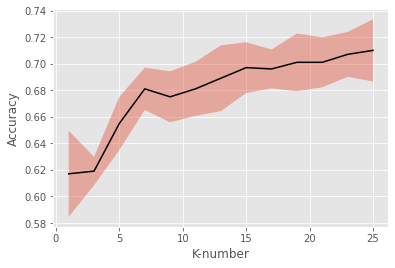

In [ ]:

performance_cv_mean = []
performance_cv_std = []

k_range = range(1,26,2)

for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    performance = cross_validation(X_clean.drop(noninformative_features,1), y_clean, model)
    performance_cv_mean.append(performance[0])
    performance_cv_std.append(performance[1])

performance_cv_mean = np.array(performance_cv_mean)
performance_cv_std = np.array(performance_cv_std)

plt.ylabel('Accuracy')
plt.xlabel('K-number') 

plt.plot(k_range, performance_cv_mean, 'k-')
plt.fill_between(k_range, performance_cv_mean-performance_cv_std, performance_cv_mean+performance_cv_std, alpha=0.4)
plt.show()

# More: https://scikit-learn.org/stable/modules/feature_selection.html

# Choosing Model Hyperparameters 
- Manual Search
- Grid Search
- Random Search
- Bayesian Optimization

### GridSearch
aka Brut Force

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'criterion':('gini', 'entropy'), 'max_depth':[2,3,4,5,6,7,8]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=parameters, cv=5, n_jobs=-1, error_score='accuracy')


In [ ]:
%%time
grid_search.fit(X_clean,y)

CPU times: user 244 ms, sys: 44.2 ms, total: 289 ms
Wall time: 2 s


GridSearchCV(cv=5, error_score='accuracy',
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
              

In [ ]:
gs_best_params = grid_search.best_params_
gs_best_params

{'criterion': 'entropy', 'max_depth': 5}

In [ ]:
pvt = pd.pivot_table(pd.DataFrame(grid_search.cv_results_),
    values='mean_test_score', index='param_criterion', columns='param_max_depth')

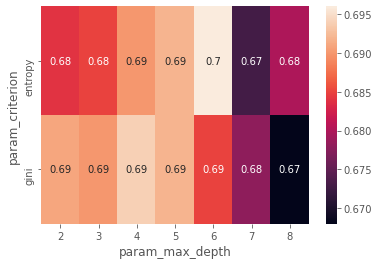

In [ ]:
sns.heatmap(pvt, annot=True)


### Random Search


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_iter_search = 6
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), 
                                   param_distributions=parameters,
                                   cv=5, n_jobs=-1, n_iter=n_iter_search)

In [ ]:
%%time
random_search.fit(X_clean,y)

CPU times: user 94.6 ms, sys: 2.1 ms, total: 96.7 ms
Wall time: 269 ms


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=42,
            

In [ ]:
rs_best_params = random_search.best_params_
rs_best_params

{'criterion': 'entropy', 'max_depth': 6}

In [ ]:
pvt = pd.pivot_table(pd.DataFrame(random_search.cv_results_),
    values='mean_test_score', index='param_criterion', columns='param_max_depth')

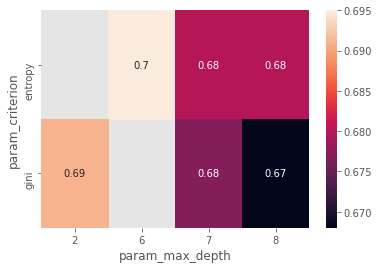

In [ ]:
sns.heatmap(pvt, annot=True)


### Bayesian Optimization
aka good buddy

In [ ]:
from hyperopt import hp, tpe, fmin, space_eval


In [ ]:
def objective(params):
    """
    Objective function to minimize
    """
    x = params['x']
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 1, -26, 36])

    return f(x) * 0.005

Text(0, 0.5, 'f(X)')

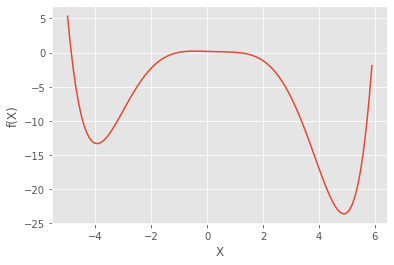

In [ ]:
d = {'x':np.arange(-5.0,6.0,0.1)}
plt.plot(np.arange(-5.0,6.0,0.1), objective(d))
plt.xlabel("X")
plt.ylabel("f(X)")

In [ ]:
space = {
    'x': hp.uniform('x',-10,10)
}

In [ ]:
%%time
best = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=30)

100%|██████████| 30/30 [00:00<00:00, 426.72it/s, best loss: -23.065832946168022]
CPU times: user 72.7 ms, sys: 1.97 ms, total: 74.7 ms
Wall time: 78.5 ms


In [ ]:
space_eval(space, best)


{'x': 4.684339730538893}

In [ ]:
def objective(params):
    """
    Objective function to minimize
    """
    model = DecisionTreeClassifier(**params)
    return -cross_validation(X,y, model)[0]

In [ ]:
space = {
    'max_depth': hp.quniform('max_depth', 1, 23, 1),
    
    'min_samples_split': hp.choice('min_samples_split', np.arange(2, 13, 1, dtype=int) ),
    
    'criterion': hp.choice('criterion', ('entropy',
                                         'gini',)),
    'random_state': 42,
}

In [ ]:
%%time
best = fmin(objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)

100%|██████████| 1000/1000 [00:06<00:00, 161.03it/s, best loss: -23.614319610388915]
CPU times: user 6.15 s, sys: 62.3 ms, total: 6.21 s
Wall time: 6.22 s


In [ ]:
bo_best_params = space_eval(space, best)
bo_best_params

{'criterion': 'gini',
 'max_depth': 2.0,
 'min_samples_split': 4,
 'random_state': 42}

In [ ]:
model = DecisionTreeClassifier(**gs_best_params, random_state=42)
print('GridSearch = \t', cross_validation(X, y, model))
model = DecisionTreeClassifier(**rs_best_params, random_state=42)
print('RandomSearch = \t', cross_validation(X, y, model))
model = DecisionTreeClassifier(**bo_best_params)
print('BayesianOpt = ', cross_validation(X, y, model))

GridSearch = 	 (0.689, 0.019339079605813686)
RandomSearch = 	 (0.688, 0.02249444375840396)
BayesianOpt =  (0.704, 0.024576411454888984)


In [ ]:
gs_best_params, rs_best_params, bo_best_params

({'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'entropy', 'max_depth': 6},
 {'criterion': 'gini',
  'max_depth': 2.0,
  'min_samples_split': 7,
  'random_state': 42})

# Main Takeaways
- Preprocessing and cleaning of data can prevent errors during the model training
- What techniques you apply to clean your data is highly dependent on the given dataset
- Data Cleaning is a very complex and time consuming task that should not be underestimated
- Overfitting is a modeling error which occurs when a function is too closely fit a limited set of data points. Overfitting the model generally takes the form of making an overly complex model to explain idiosyncrasies in the data under study
- Underfitting (opposite of overfitting) refers to a model that can neither model the training data nor generalize to new data
- Use Cross-Validation for the hyperparameters selection
- If you have a tremendous amount of computation power and time use the greed search for the model comparing, otherwise try to find more intelligent ways such as Bayesian optimization

# Refereces
- https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn
- https://stats.libretexts.org/Bookshelves/Computing_and_Modeling/RTG%3A_Classification_Methods/3%3A_K-Nearest_Neighbors_(KNN)
- https://pubmed.ncbi.nlm.nih.gov/30060039/